In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from __future__ import absolute_import, division, print_function, unicode_literals
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf
os.getcwd()
os.listdir('.')
print(os.getcwd())
print(os.chdir('/content/drive/MyDrive/Proj_colab'))


/content
None


In [3]:
# %% Read the original data and drop the columns
#originalD = pd.read_csv('data/Original_data.csv', low_memory=False)
originalD = pd.read_csv('data/Original_data1.csv', low_memory=False)
original_F = originalD.drop(['birthyr','faminc','employ','marstat','child18','pid3','pid7','votereg','presvote16post','ideo5','newsint','inputstate'], axis = 1)
original_F


,id,gender,race,educ,region
0,371823339,Male,White,High School Graduate,Midwest
1,398212310,Male,White,High School Graduate,South
2,392933925,Male,White,No High School Degree,NorthEast
3,372445135,Male,White,High School Graduate,Midwest
4,392602384,Male,White,High School Graduate,South
...,...,...,...,...,...
4995,287972460,Female,Mixed Race,High School Graduate,Midwest
4996,137306469,Female,Mixed Race,High School Graduate,South
4997,133663305,Female,Native American,4-year College Degree,Midwest
4998,77524502,Female,Other,Post graduate Degree,South


In [4]:
# %% Read the breached  data and drop the columns
breachD = pd.read_csv('data/breached_data.csv', low_memory=False)
breach_F = breachD.drop(['Title','Domain','Name','BreachDate','AddedDate','ModifiedDate','IsSpamList','IsVerified','IsFabricated','IsSensitive','IsActive','IsRetired','PwnCount','LogoType','DataClasses'], axis = 1)
breach_F.loc[:,'Breached'] ='1'
breach_F["Breached"] = breach_F["Breached"].astype(object).astype(int)
breach_F

,id,Breached
0,135664815,1
1,355286483,1
2,355286483,1
3,355286483,1
4,339141795,1
...,...,...
14974,131884325,1
14975,131884325,1
14976,131884325,1
14977,131884325,1


In [5]:
breach_F1 = breach_F.drop_duplicates(subset =["id"] )
breach_F1["Breached"].replace({1: 0},inplace = True)
#df["column1"].replace({"a": "x", "b": "y"}, inplace=True)
#breach_F = breach_
#breach_F.loc[:,'Breached'] ='1'
breach_F1

,id,Breached
0,135664815,0
1,355286483,0
4,339141795,0
5,341961164,0
6,374206867,0
...,...,...
14960,137327203,0
14963,334328189,0
14967,151192859,0
14973,152094711,0


In [6]:
df3 = pd.merge(breach_F, breach_F1, how='outer')
df3

,id,Breached
0,135664815,1
1,355286483,1
2,355286483,1
3,355286483,1
4,339141795,1
...,...,...
19116,137327203,0
19117,334328189,0
19118,151192859,0
19119,152094711,0


In [7]:
# %% Merge the two files
fin_dat = pd.merge(original_F, df3, on='id', how='inner')
print("Number of rows in the final dataset: ", fin_dat.shape[0])
fin_dat.head(5)


Number of rows in the final dataset:  19121


,id,gender,race,educ,region,Breached
0,371823339,Male,White,High School Graduate,Midwest,1
1,371823339,Male,White,High School Graduate,Midwest,1
2,371823339,Male,White,High School Graduate,Midwest,0
3,392933925,Male,White,No High School Degree,NorthEast,1
4,392933925,Male,White,No High School Degree,NorthEast,1


In [8]:
#input
x=fin_dat.drop('Breached',axis=1)
y= fin_dat.Breached
#splitting
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
#printing shapes of testing and training sets :
print("shape of original dataset :", fin_dat.shape)
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)

shape of original dataset : (19121, 6)
shape of input - training set (13384, 5)
shape of output - training set (13384,)
shape of input - testing set (5737, 5)
shape of output - testing set (5737,)


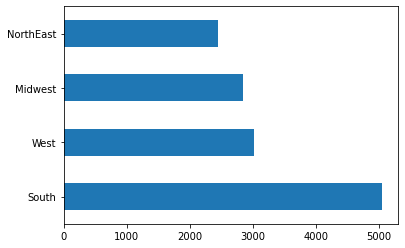

In [9]:
x_train['region'].value_counts().plot(kind='barh')

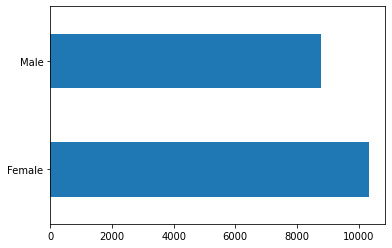

In [10]:
fin_dat.gender.value_counts().plot(kind='barh')

Text(0.5, 0, '% Breached')

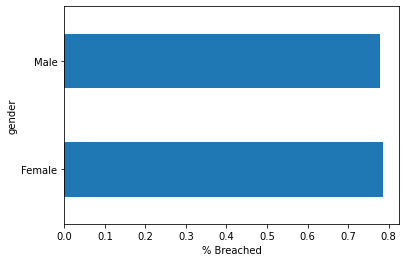

In [11]:
pd.concat([x_train,y_train],axis=1).groupby('gender').Breached.mean().plot(kind ='barh').set_xlabel('% Breached')



In [12]:
CATEGORICAL_COLUMNS = ['gender', 'race', 'educ', 'region']
#NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = x_train[feature_name].unique()  # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

#for feature_name in NUMERIC_COLUMNS:
 # feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='gender', vocabulary_list=('Male', 'Female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='race', vocabulary_list=('White', 'Black', 'Mixed Race', 'Hispanic', 'Other', 'Middle  Eastern', 'Asian', 'Native American'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='educ', vocabulary_list=('4-year College Degree', 'Some  College ,but no degree yet', 'High School Graduate', 'No High School Degree', '2-year College Degree', 'Postgraduate Degree', 'Post graduate Degree'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='region', vocabulary_list=('West', 'South', 'Midwest', 'NorthEast'), dtype=tf.string, default_value=-1, num_oov_buckets=0)]


In [13]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(x_train, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(x_test,y_test , num_epochs=1, shuffle=False)


In [14]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
# We create a linear estimtor by passing the feature columns we created earlier

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpasmd78x6', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [15]:
linear_est.train(train_input_fn)  # train
result = linear_est.evaluate(eval_input_fn)  # get model metrics/stats by testing on tetsing data

clear_output()  # clears consoke output
print(result['accuracy'])  # the result variable is simply a dict of stats about our model

0.7833362


In [16]:
result = list(linear_est.predict(eval_input_fn))
print(x_train.loc[0])
print(result[1]['probabilities'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpasmd78x6/model.ckpt-4190
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
id                   371823339
gender                    Male
race                     White
educ      High School Graduate
region                 Midwest
Name: 0, dtype: object
[0.22011276 0.77988726]


In [ ]:
pred_dicts = list(linear_est.predict(eval_input_fn))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

probs.plot(kind='hist', bins=20, title='predicted probabilities')

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
